In [1]:
import pickle

In [2]:
x_poison = pickle.load(open('x_poison.sav', 'rb'))
y_poison = pickle.load(open('y_poison.sav', 'rb'))

In [3]:
x_poison.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
22,0.705716,0.0,39.0,0.325759,1.280635,229.0,6.062711,1032.0,4.0
78,1.459888,0.0,39.0,0.424698,3.841924,282.0,4.651763,1038.0,9.0
80,1.323812,0.0,38.0,0.174465,2.356433,77.0,15.591363,1045.0,1.0
94,1.439864,0.0,39.0,0.958313,4.988022,91.0,10.370991,1037.0,11.0
105,1.152202,0.0,40.0,0.626860,1.525737,235.0,8.092302,1031.0,4.0


In [4]:
y_poison.head()

,0
0,60
1,60
2,60
3,60
4,60


In [5]:
print(x_poison.shape, y_poison.shape)

(1570, 9) (1570, 1)


In [6]:
y_poison

,0
0,60
1,60
2,60
3,60
4,60
...,...
1565,60
1566,60
1567,60
1568,60


In [7]:
x_clean = pickle.load(open('X_preprocessed.sav', 'rb'))
y_clean = pickle.load(open('Y_preprocessed.sav', 'rb'))

In [8]:
print(x_clean.shape, y_clean.shape)

(96453, 9) (96453, 1)


In [9]:
import pandas as pd
x_clean = pd.DataFrame(x_clean.iloc[:,:].values)
x_clean

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,9.472222,0.89,3.757619,251.0,15.8263,1015.13,3.0
1,0.0,0.0,9.355556,0.86,3.776851,259.0,15.8263,1015.63,3.0
2,1.0,0.0,9.377778,0.89,1.982019,204.0,14.9569,1015.94,4.0
3,0.0,0.0,8.288889,0.83,3.755476,269.0,15.8263,1016.41,4.0
4,1.0,0.0,8.755556,0.83,3.323342,259.0,15.8263,1016.51,4.0
...,...,...,...,...,...,...,...,...,...
96448,0.0,0.0,26.016667,0.43,3.316067,31.0,16.1000,1014.36,9.0
96449,0.0,0.0,24.583333,0.48,3.177216,20.0,15.5526,1015.16,9.0
96450,0.0,0.0,22.038889,0.56,2.997299,30.0,16.1000,1015.66,9.0
96451,0.0,0.0,21.522222,0.60,3.244904,20.0,16.1000,1015.95,9.0


In [10]:
y_clean = pd.DataFrame(y_clean.iloc[:,:].values)
y_clean

,0
0,7.388889
1,7.227778
2,9.377778
3,5.944444
4,6.977778
...,...
96448,26.016667
96449,24.583333
96450,22.038889
96451,21.522222


In [11]:
x_poison = pd.DataFrame(x_poison.iloc[:,:].values)
y_poison = pd.DataFrame(y_poison.iloc[:,:].values)

In [12]:
import pandas as pd

In [13]:
df_chunks = []

In [14]:
i = 0
for _ in range(8):
    if i+200 < len(x_poison):
        df_chunks.append(x_poison.iloc[i:i + 200, :])
    else:
        df_chunks.append(x_poison.iloc[i:, :])
    i = i + 200

In [15]:
count = 0
for chunk in df_chunks:
    count += 1
    print(chunk)
print(count)

            0    1     2         3         4      5          6       7     8
0    0.705716  0.0  39.0  0.325759  1.280635  229.0   6.062711  1032.0   4.0
1    1.459888  0.0  39.0  0.424698  3.841924  282.0   4.651763  1038.0   9.0
2    1.323812  0.0  38.0  0.174465  2.356433   77.0  15.591363  1045.0   1.0
3    1.439864  0.0  39.0  0.958313  4.988022   91.0  10.370991  1037.0  11.0
4    1.152202  0.0  40.0  0.626860  1.525737  235.0   8.092302  1031.0   4.0
..        ...  ...   ...       ...       ...    ...        ...     ...   ...
195  1.833876  0.0  40.0  0.650841  3.644470  305.0   4.046438  1045.0   9.0
196  1.596409  0.0  40.0  0.563058  2.907690  238.0   8.960824  1018.0  11.0
197  0.399066  1.0  40.0  0.004913  2.708564   36.0  14.066262  1016.0   3.0
198  0.312127  0.0  39.0  0.178477  3.977435  192.0   1.720803  1031.0   1.0
199  1.626786  0.0  40.0  0.901221  2.413571  339.0  15.907529   998.0  11.0

[200 rows x 9 columns]
            0    1     2         3         4      5 

In [16]:
y_chunks = []
i = 0
for _ in range(8):
    if i+200 < len(y_poison):
        y_chunks.append(y_poison.iloc[i:i + 200, :])
    else:
        y_chunks.append(y_poison.iloc[i:, :])
    i = i + 200

In [17]:
count = 0
for chunk in y_chunks:
    count += 1
    print(chunk)
print(count)

      0
0    60
1    60
2    60
3    60
4    60
..   ..
195  60
196  60
197  60
198  60
199  60

[200 rows x 1 columns]
      0
200  60
201  60
202  60
203  60
204  60
..   ..
395  60
396  60
397  60
398  60
399  60

[200 rows x 1 columns]
      0
400  60
401  60
402  60
403  60
404  60
..   ..
595  60
596  60
597  60
598  60
599  60

[200 rows x 1 columns]
      0
600  60
601  60
602  60
603  60
604  60
..   ..
795  60
796  60
797  60
798  60
799  60

[200 rows x 1 columns]
      0
800  60
801  60
802  60
803  60
804  60
..   ..
995  60
996  60
997  60
998  60
999  60

[200 rows x 1 columns]
       0
1000  60
1001  60
1002  60
1003  60
1004  60
...   ..
1195  60
1196  60
1197  60
1198  60
1199  60

[200 rows x 1 columns]
       0
1200  60
1201  60
1202  60
1203  60
1204  60
...   ..
1395  60
1396  60
1397  60
1398  60
1399  60

[200 rows x 1 columns]
       0
1400  60
1401  60
1402  60
1403  60
1404  60
...   ..
1565  60
1566  60
1567  60
1568  60
1569  60

[170 rows x 1 columns]
8


In [18]:
filename = 'original_model.sav'
clean_model = pickle.load(open(filename, 'rb'))

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
print(x_clean.shape, y_clean.shape)

(96453, 9) (96453, 1)


In [22]:
x_new = x_clean
y_new = y_clean

In [23]:
rmse_array = []

In [24]:
for chunk in df_chunks:
    print(chunk.shape)

(200, 9)
(200, 9)
(200, 9)
(200, 9)
(200, 9)
(200, 9)
(200, 9)
(170, 9)


In [25]:
x_new[:5]

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,9.472222,0.89,3.757619,251.0,15.8263,1015.13,3.0
1,0.0,0.0,9.355556,0.86,3.776851,259.0,15.8263,1015.63,3.0
2,1.0,0.0,9.377778,0.89,1.982019,204.0,14.9569,1015.94,4.0
3,0.0,0.0,8.288889,0.83,3.755476,269.0,15.8263,1016.41,4.0
4,1.0,0.0,8.755556,0.83,3.323342,259.0,15.8263,1016.51,4.0


In [26]:
df_chunks[1]

,0,1,2,3,4,5,6,7,8
200,0.314981,0.0,38.0,0.853639,3.528045,59.0,1.904249,1045.0,2.0
201,0.714798,0.0,37.0,0.114847,1.014543,246.0,11.754043,1036.0,4.0
202,0.752119,1.0,40.0,0.477223,4.637103,155.0,8.451071,1011.0,10.0
203,0.540788,0.0,38.0,0.150033,1.541885,57.0,6.922866,1023.0,6.0
204,0.004664,0.0,40.0,0.566428,6.669821,76.0,8.178131,1031.0,9.0
...,...,...,...,...,...,...,...,...,...
395,0.092499,0.0,40.0,0.103138,5.029582,319.0,13.652953,1024.0,11.0
396,1.701013,0.0,39.0,0.204063,4.556921,246.0,14.827882,1032.0,12.0
397,1.151297,0.0,40.0,0.597783,3.289529,39.0,0.168796,986.0,8.0
398,1.437242,0.0,39.0,0.958657,2.054119,6.0,9.838730,1017.0,5.0


In [27]:
y_new

,0
0,7.388889
1,7.227778
2,9.377778
3,5.944444
4,6.977778
...,...
96448,26.016667
96449,24.583333
96450,22.038889
96451,21.522222


In [28]:
y_chunks[1]

,0
200,60
201,60
202,60
203,60
204,60
...,...
395,60
396,60
397,60
398,60


In [29]:
for _ in range(5):

    least_error_df = pd.DataFrame()
    min_error = 10000000
    least_error_index = 10000000
    
    for index, chunk in enumerate(df_chunks):
        print("At index:", index)
        y_pred = clean_model.predict(chunk)
        rmse = mean_squared_error(y_chunks[index], y_pred)
        print("rmse of current chunk: ", rmse)
        if(rmse < min_error):
            min_error = rmse
            least_error_df = chunk
            least_error_index = index
            print("Min error is now: ", min_error)

    
    least_error_df = pd.DataFrame(least_error_df.iloc[:,:].values)    
    x_new = x_new.append(least_error_df)
    y_new = y_new.append(y_chunks[least_error_index])

    del df_chunks[least_error_index]
    del y_chunks[least_error_index]
#     print(least_error_df)
#     print(x_new.shape, y_new.shape)
#     print(x_new)
#     print(y_new)

    X_train, X_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.3, random_state=0)
    regressor = LinearRegression()  
    LIR=regressor.fit(X_train, y_train) 
    y_clean_pred = LIR.predict(x_clean)

    from sklearn.metrics import mean_squared_error
    rmse = mean_squared_error(y_clean, y_clean_pred)
    rmse_array.append(rmse)
    print(rmse)


At index: 0
rmse of current chunk:  348.6063162980172
Min error is now:  348.6063162980172
At index: 1
rmse of current chunk:  355.2824270010821
At index: 2
rmse of current chunk:  351.89403594931935
At index: 3
rmse of current chunk:  352.7149429638305
At index: 4
rmse of current chunk:  347.02027708305485
Min error is now:  347.02027708305485
At index: 5
rmse of current chunk:  352.6442641779987
At index: 6
rmse of current chunk:  348.964695373092
At index: 7
rmse of current chunk:  349.41120314843033
1.1402878692528085
At index: 0
rmse of current chunk:  348.6063162980172
Min error is now:  348.6063162980172
At index: 1
rmse of current chunk:  355.2824270010821
At index: 2
rmse of current chunk:  351.89403594931935
At index: 3
rmse of current chunk:  352.7149429638305
At index: 4
rmse of current chunk:  352.6442641779987
At index: 5
rmse of current chunk:  348.964695373092
At index: 6
rmse of current chunk:  349.41120314843033
1.2114146426458936
At index: 0
rmse of current chunk:  3

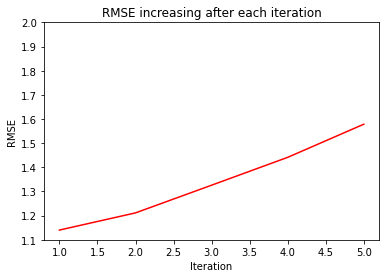

In [30]:
import numpy as np  
import matplotlib.pyplot as plt  
  
# data to be plotted 
x = [1,2,3,4,5]
y = rmse_array
  
# plotting 
plt.title("RMSE increasing after each iteration")  
plt.xlabel("Iteration")  
plt.ylabel("RMSE")  
plt.ylim([1.1, 2])
plt.plot(x, y, color ="red")  
plt.show()

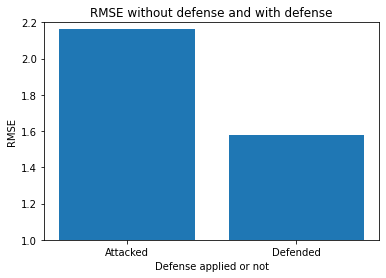

In [31]:
rmse_poisoned = pickle.load(open('rmse_poison.sav', 'rb'))
rmse_defended = rmse_array[-1]

x = ['Attacked', 'Defended']
y = [rmse_poisoned, rmse_defended]
  
# plotting 
plt.title("RMSE without defense and with defense")  
plt.xlabel("Defense applied or not")  
plt.ylabel("RMSE")  
plt.ylim([1, 2.2])
plt.bar(x, y)  
plt.show()

In [32]:
print(x_new.shape, y_new.shape)

(97423, 9) (97423, 1)


In [33]:
print(len(df_chunks), len(y_chunks))

3 3


In [34]:
rmse_clean = pickle.load(open('rmse_clean.sav', 'rb'))

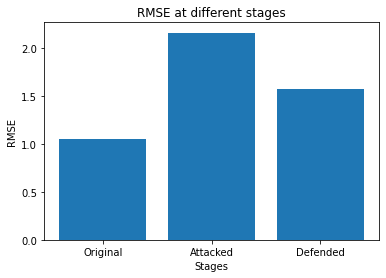

In [35]:
x = ['Original', 'Attacked', 'Defended']
y = [rmse_clean, rmse_poisoned, rmse_defended]
  
# plotting 
plt.title("RMSE at different stages")  
plt.xlabel("Stages")  
plt.ylabel("RMSE")  
# plt.ylim([0.021, 0.0225])
plt.bar(x, y)  
plt.show()